# 다양한 OCR모델 비교하기
-----
### 프로젝트 - 다양한 OCR모델 비교하기

Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하고 검증해 보는 프로젝트를 진행하겠습니다. OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

## 용어정리
---

**✓ OCR(Optical Character Recognition, 광학 문자 인식)**이란?
>* 문자를 읽는 기술
>* 예) 신용카드 읽기를 이용한 결제서비스
>* 참고자료
>>* [4차 산업 고도화의 '촉매'가 되는 OCR](https://blog.naver.com/kpostbank/221343765011)

## 학습목표
>1. OCR의 과정을 이해합니다.
2. 문자인식 결과의 표현방식을 이해합니다.
3. 파이썬을 통해 OCR을 사용할 수 있습니다.

## 순서
> **Step1.** 검증용 데이터셋 준비<br>
**Step2.** Google OCR API, keras-ocr, Tesseract로 테스트 진행<br>
**Step3.** 테스트 결과 정리<br>
**Step4.** 결과 분석과 결론 제시<br>

개인 실습환경에 따라 필요한 경로를 지정, 디렉토리를 생성해 주세요.
> $ mkdir -p ~/aiffel/ocr_python

**✓ `구글의 파이썬 API 인터페이스 모듈`** :  OCR을 데모로 이용

1) 구글의 파이썬 API 인터페이스 모듈을 아래와 설치

In [1]:
# $ pip install --upgrade google-api-python-client
# $ pip install google-cloud-vision

2) Google Cloud Vision API 사용 : 브라우저에서 다운로드한 인증키는 다음 경로에 **`my_google_api_key.json`**이라는 파일명으로 저장(파일은 처음에 sheet-contents-로 시작되는 이름으로 자동 저장)

In [2]:
# $ cp ~/Downloads/sheet-contents-xxxx.json ~/aiffel/ocr_python/my_google_api_key.json

3) 인증키 경로 등록 후 커널 재기동 : 터미널을 열고 아래와 같이 인증키 경로 변수를 등록한 후 커널을 종료하고 재기동

In [3]:
# $ GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json

**TIPS]** 만약 구글 API를 계속 사용하고 싶다면 아래와 같이 환경변수에 등록해 주면 위와 같이 매번 경로 변수 설정을 하지 않아도 됩니다.

In [4]:
# $ echo "export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json" >> ~/.bashrc

> **TIPS]** 이전에 구글 API 계정을 생성한 후 결제정보가 만료된 경우에는 위의 OCR API 호출시 billing 관련 오류가 날 수 있습니다. 오류메시지 아래쪽의 링크를 따라가서 결제계정을 재활성화해야 API 호출이 가능합니다.
혹은 다른 계정을 생성하고 인증키를 다시 받는 방법도 있습니다.

**✓ `keras-ocr`** : 직접 OCR 모델을 만들어 돌려보고 싶을 때, 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 함

1) 텐서플로우 버전을 확인

> **TIPS]** keras-ocr 은 **tensorflow 버전 2.2.0** 에서 구동됩니다. 2.3.X 이상 버전에서는 미리 학습된 모델에서 오류가 발생할 수 있으니 주의하세요. 또한, keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델입니다. 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의해 주세요.

In [5]:
# $ pip list | grep tensorflow

# # 만약 tensorflow 버전이 맞지 않다면 재설치를 해줍시다. 
# $ pip uninstall tensorflow
# $ pip install tensorflow==2.2.0

2) keras-ocr 사용을 위해서 설치

In [6]:
# $ pip install keras-ocr

3) **`keras_ocr`**과 인식결과의 시각화를 위한 **`matplotlib.pyplot`**를 호출 : **`keras_ocr.pipeline.Pipeline()`**는 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러옴!

In [7]:
# $ GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json

**TIPS]** 아래 과정은 GPU를 사용할 수 있습니다. 평소 GPU 사용 시 cuDNN 관련 에러가 있었다면 아래 명령어를 사용해 보세요.

In [8]:
# $ export TF_FORCE_GPU_ALLOW_GROWTH=true

4) 확인을 위해서 터미널을 열어 다음과 같이 확인 : **`true`**가 출력되어야 환경설정에 반영

In [9]:
# $ echo $TF_FORCE_GPU_ALLOW_GROWTH

**✓ `Tesseract`** : 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tessearct.js등으로 확장되는 등 많은 곳에서 사용

1) 테서랙트 설치 : 우분투에서 실행할 경우 터미널에서 아래 코드를 사용해 테서랙트 관련 패키지들을 설치

In [10]:
# $ sudo apt install tesseract-ocr
# $ sudo apt install libtesseract-dev

2) 테서랙트 파이썬 wrapper 설치하기 : **`Pytesseract`**는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수있도록 해주는 래퍼 라이브러리(wrapper library)

In [11]:
# $ pip install pytesseract

3) 테서랙트로 문자 검출하고 이미지 자르기 (detection) : 한 번에 이미지 내의 문자 검출과 인식을 할 수 있음!

In [12]:
# # import os
# import pytesseract
# from PIL import Image
# from pytesseract import Output
# import matplotlib.pyplot as plt

# # OCR Engine modes(–oem):
# # 0 - Legacy engine only.
# # 1 - Neural nets LSTM engine only.
# # 2 - Legacy + LSTM engines.
# # 3 - Default, based on what is available.

# # Page segmentation modes(–psm):
# # 0 - Orientation and script detection (OSD) only.
# # 1 - Automatic page segmentation with OSD.
# # 2 - Automatic page segmentation, but no OSD, or OCR.
# # 3 - Fully automatic page segmentation, but no OSD. (Default)
# # 4 - Assume a single column of text of variable sizes.
# # 5 - Assume a single uniform block of vertically aligned text.
# # 6 - Assume a single uniform block of text.
# # 7 - Treat the image as a single text line.
# # 8 - Treat the image as a single word.
# # 9 - Treat the image as a single word in a circle.
# # 10 - Treat the image as a single character.
# # 11 - Sparse text. Find as much text as possible in no particular order.
# # 12 - Sparse text with OSD.
# # 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

# def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
#     if not os.path.exists(output_path):
#         os.mkdir(output_path)
#     custom_oem_psm_config = r'--oem 3 --psm 3'
#     image = Image.open(image_path)

#     recognized_data = pytesseract.image_to_data(
#         image, lang='eng',    # 한국어라면 lang='kor'
#         config=custom_oem_psm_config,
#         output_type=Output.DICT
#     )
    
#     top_level = max(recognized_data['level'])
#     index = 0
#     cropped_image_path_list = []
#     for i in range(len(recognized_data['level'])):
#         level = recognized_data['level'][i]
    
#         if level == top_level:
#             left = recognized_data['left'][i]
#             top = recognized_data['top'][i]
#             width = recognized_data['width'][i]
#             height = recognized_data['height'][i]
            
#             output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
#             cropped_image = image.crop((
#                 left,
#                 top,
#                 left+width,
#                 top+height
#             ))
#             cropped_image.save(output_img_path)
#             cropped_image_path_list.append(output_img_path)
#             index += 1
#     return cropped_image_path_list


# work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

# cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

### Step1. 검증용 데이터셋 준비
---
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

오늘 사용할 패키지를 불러옵니다.<br>터미널에서 **`pip install [패키지명]`**을 사용해 필요한 패키지를 설치해 주세요.<br>아래 명령어를 복사해서 설치해도 됩니다.

> $ pip install [패키지명]

**✓ 패키지(라이브러리)들을 import 해보겠습니다.**

In [28]:
import cv2
import os
import keras_ocr
import pytesseract
import matplotlib.pyplot as plt

from PIL import Image
from pytesseract import Output

**✓ 데이터 로드**

아이슬란드명함.jpeg


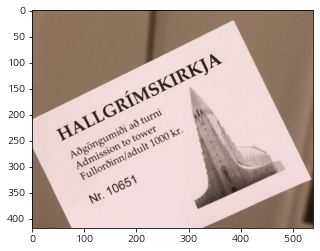

이태리메뉴판.jpg


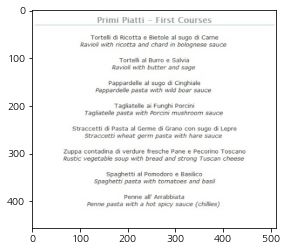

라오스메뉴판.JPG


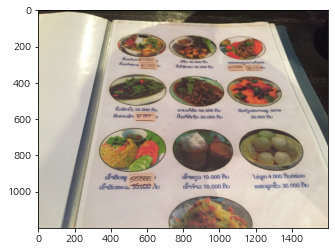

1


error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [29]:
path = os.getenv('HOME')+'/aiffel/ocr_python/data/'  # 이미지들이 있는 경로

def search(dirname):
    filenames = os.listdir(dirname)
    f_list = []
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        f_list.append(full_filename)
        print (filename)
        img = cv2.imread(full_filename, cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    return f_list
f_list = search(path)

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
---
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

**✓ Google API**

In [ ]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    print('\n"{}"'.format(texts[0].description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in texts[0].bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

for p_img in f_list:
    detect_text(p_img)

**✓ Keras-ocr**

In [30]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj49/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj49/.keras-ocr/crnn_kurapan.h5


In [31]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = ['https://d4t7t8y8xqo0t.cloudfront.net/resized/1080X/restaurant%2F669567%2Fmenu%2Fmenu51573103977213.jpg',
              'https://t1.daumcdn.net/cfile/tistory/23083D3E55F12B6D30',
              'https://s3-media0.fl.yelpcdn.com/bphoto/-O05lhjLhG0NYCduJK_FMQ/l.jpg',
              'https://cdn2.th.orstatic.com/userphoto/File/0/3/0000LD335993B5A7D0CDC2kx.jpg',
              'https://scpic.chinaz.net/files/pic/psd1/201912/zpsd2062.jpg',
              'https://i.pinimg.com/474x/04/5d/ba/045dba83186fa9ef831e655f410635a3.jpg',
              'https://quanangansanbay.com/uploads/comnieu/nhahang/quan-an-viet-nam-ngon-o-sai-gon-3-721x1024.jpg',
              'https://media-cdn.tripadvisor.com/media/photo-s/0c/50/f5/60/daftar-menu-makanan-juga.jpg',
              'https://i.pinimg.com/originals/f2/38/b8/f238b8283a9cabf75b5e02801400b73d.gif',
              'https://previews.123rf.com/images/madrabothair/madrabothair1607/madrabothair160700502/59781308-foto-di-una-scheda-del-menu-in-un-ristorante-italiano-in-una-citt%C3%A0-italiana.jpg',
              'https://media.gettyimages.com/photos/deutschland-gastronomie-mentafel-mit-angebot-von-matjesgerichten-picture-id544606101',
              'https://pbs.twimg.com/media/Drxb_qiVAAAfYfX.jpg',
              'https://i.ebayimg.com/images/g/AEAAAOSwOC9fkYSf/s-l960.jpg',
              'https://www.alaraby.co.uk/sites/default/files/media/images/F81CC7A3-79D3-43ED-877A-E027C582524C.jpg',
              'https://www.boookart.com/uploads/boookart/products/new-doc-2020-01-18-17261310-282786_l.jpg',
              'https://f.ptcdn.info/226/060/000/pghh23tinxaSa3Cc49a-o.jpg',
              'https://lh3.googleusercontent.com/proxy/cKBK3TdxS9-v8wtj3XHB74XC6vJQpvGSjz3K87OfQcHRElC54ZquuQXOUbyZk5ZGPM9wh_4m0Da8VfD2DfjnbKyOF_MwDxt_m3ngKjMm0uQ7yq_u4No6FIPRSivjUHg',
              'https://lh3.googleusercontent.com/proxy/JiBmUwaiH0yX-gVWQQsWHnagrkARfTjL-6J8xWmhixaMeIWWZE_hkI9k6t7KUR1mYCgZyyXRTTGyP-RJbdlgvGa5XCIG_6qBtrZ0gQ'
              'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhMWFhUXFxgXGRUYGBcYGBcYGBcXFxcYFxgYHSggGBolGxcZITIhJSkrLi4uGB8zODMtNygtLisBCgoKDg0OGhAQGy0lICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKgBLAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQIDBgEAB//EAE0QAAIBAgQCBgYFCAgFAwUBAAECEQADBBIhMQVBBhMiUWFxMoGRobHBQlJys9EHFCMzYoKy8BYkJTVzksLhFUNjk/FEotJTVYOj4hf/xAAaAQACAwEBAAAAAAAAAAAAAAABAgADBAUG/8QAMxEAAQMCBAQEBQQCAwAAAAAAAQACEQMhBBIxQRNRYXEFIoGRMqGx0fAVQsHhFFIzYvH/2gAMAwEAAhEDEQA/APl2KwJgZV0CiT40usjU1tUVCpzDlp6hp8ax1kdo+v3a/Ko4JloOHLCsd4tN+NKeFegPtfOmNrEKqXBqM1sgHxyzFLuEjsfvfMUWKPBGq+hdHf1CeR+8uU3QUq6Pp+iUeE/5mdh7iKcoK0gyqV0CpsWAkCT3TE+uupVy0VFHgeJuXEY3LRtEOVylg0gBSGkaQZO07Vluki/1tz9j7ta2llgNJE901iukdz+t3B4L92tQSZjko6LTzWQ4/hWDtcDelBygNICqASSAQBpzjn6yei9lxeLPJypoSSQZObQn7FOrWNgxkUgTv7eQn31y3iCQ5KqsA+jPMQdye+shN1dFpSnG4gojsFDHsKARmBOZmOn2YNI34s5a4zKMzobR3AA0kAGddNq0XVqU7bXF7QINsgHsoFaZGomlPFQq22y3nYErKNatrmIOhzq0yI5ihIlS6lw7jSIoHW4u2w36u4pSe/q2j2SaJ4Jx17S3MuKRGdyzLcsswYn6ZdASCZOlFqGVVBtYK8AAASjK8Acyw+dU/m1p+02AMHnYvZvWFDaeylkKXRF3pDdGGe1mwzqUZJS4wcKwK6K0ExPdR/AuLPatWwcNeKrbCzbVbk8y2jCJJJj8Kzl7h+FIlfzm34OhYDv1VT8aXHBQ36K8p7iGCE+otM0QAoZWg6ScSS7ct5A1sJbvaOpVs91GAMees0Zw17arYIvKGRQGQsFIJ7TaNE6k7TNZPE2cQpm71msLL5jInMBLcpWfVUhxdyMpS05jL2rSZgNtCoBB8d6hAKErbdD0LWrlw6dZda54gzqCO6ZoTpa2Y2bcSXuCfFV9L41lrWLCAZ7BkaZgzoT8ZqZ4khdW/SgAH6QdgT9UtECN6mWbqStPxfFAWWjdyqeo9o+5PfWNsN2X8SPdJ+fwo3G8RDgAXGYa9llyxIA0K6EnxiPXQNoaafET7JoBpCJMrh1OldtKWOg2Mx7IHrNRgg92tOejOFz3rSkelcLnytCQfIsSvqpkFq+ORh8CVG+VbY8zCz86+fh9G17lHP7R18B762H5RMT2rNkeLke4D3n2Vh2nQfzr31CgQiGcFhpoTP7o2+FdW7AmIMk/P3QKgOfjCjy510280KNyQPX/AOIoILlx+yBP7XrMj8a8uwURvPIeG5qo6mPHn3CpE0YUhPuiKK2JtBxK50zQJOXOoO2+lbLi6oMHcNsFLbYg5F3yoM2UGdzED1Vlvyc3AuMtuRIVg0Dwlh7wK1XSC7/UrIn07txz3/zqafDiavso+1M+qrsXOqwFlixGZ7u0CYUKfdIqrpCh/ObZK6LbsDQAKItZ8vhqTpVXSBf6tgbQ5nP/AJmYfhRfFrhfHtZ5dYAPNQbXs29lMBaUZ2Q3SzAl8U+ViDbtYe3oPRhUG/iS1WcD6L2ntlr05s7DXeAY19YNOeKYINexYU9q46RPhnaB6hVmEzC2gkT258+teaBRhZVP1GrLmK6mPOfKsPhD2ifP51vsVgmGHY6CV156dwrAYZNaV6I1TXEWibRdRooIPhIIGnu0oThHoH7X4UykDC3ROumnhPwpbwc9g/a/ChTEFGo4m3JbzhePW2igqxORDpAAGolmYhRz0mdDpTyxiAw0nTcHQjnqKyt7Ds9pFAaMiHMAWElWWGCywHOQCNDMU74NhGXUzGULrIntM0wdQBMa1qaPKqTqnKVatVItWIKiC7dwa3J3DgDWTEaxI2OtY3jSxiXn6q/wLW2GIVZ+sY08Bt86xfGDOJb7A9yj8KDIl3Y/wo+YHcIBudcJ7D+MAevX5V5zvUHaLQP7UnyVmP8ACay/uV+yFxYlV7RHpNp3MxIpHj3JyrM9ofA/jTvE6ADmFAPsn50lxKTcQd5/Ck3QU1uumkMf3pGsnaPOotfZfrLpGwot8J40Ni8OaQwmXeFYnqmJzsJ3IzAz4xTK7xVHBDuGnkyzv4kSKU4W0V1B9VXXMQ0ag+ehHtoyJlAlD3LdvMCgAk6wSPDnt30zOIUDXrT4hwdPHMrA+yktvVu8d3+1X9XOwok9UNkzGMt8ndRzHV2pjwZCmvmKZHB4K7qlxx/iWkf3qAffWbZn8fbyq3DMwBgkeUUCip8bwNq2ua3cRiTEKtxTEEzDMRGgGnfXE4C5UFHttoJAuAGfJgPnQmJfMwDayfKpqrA89DFGTCCtHAsQNRbY/ZyvP+UmnfDeiuKhblu8EaBoS6FZ1KyAedC4a62UCSIIJMmO7Wp4ziTqTlmIgGQwk6jl40gqmYhSAlePa691hcYO6sUzEyCUnshjHj3VTevloQrJGojfY7HWRzjbSndzjVzLqpI2n8R+NewuDXrSwAJETIzbj9qe6nzjcKRySG6o07LrlmZkifIjsnwqnMDqG11j1+vT/atwbyhcrW1IkEbjVZjYjkTVOKuWroYNbI03XL9QKIkEzCjnvS8TojlCxSAeG1XWY3InQ6aHXlPhT65gcGg1dpAPpLmk6gSQVMDuEUFjsBhyZs3lUEyFfMIHIbHx1qzOClyp/wDktsq2MGbQZbh7oy2nMzyg60649ZnC2DmVQigwdCxcmMvf6JpJ0I/q73GDK5Fm9BU9mWQ2+7lmmmXSNy13DWzyRFjzNWUCc5I/LKVPhg/l0xxPCXuXbBlRbs9UGlo+ijGBz517A8PduIrdyNk6yc3LRiwqnjeE6zG+nFteyUEySqMzGNtlGtR6LM9u6SCQptXDA2kKAPLtEVYNEp1VWFxN25ec3JUhhAgqdM0GDzip47jj2hbUAGUzE6bl3mlt9sU9wlrssGO+keWlDdIs3WqGIkW7c6Rqyh9v3qsaMxAPJK4wLJ7eH6G4OQQ+7WspwHovexFsXLZt5ZIhmYNoYOgUj305xGOy2mBO6ke0GpcBb+yWP7Z+9WqXBO52VpKCxvQvF5TCoYB2cDn+1HKhuH9EsYiENYMzOjWzyH1Wq1MbcG1xh5Ow+Boq1xjEDa9c9bE/Gq2uaNlldjg6JHRaPg+DuooDIwIRBqDuM00yCNzB9lZO30ixI2vH1qh+K0dZ6V4kbsp81HyirRVAS/5bDzWhz1K0xpTa6Y3ua2j+63/yoy30s+tYQ/z4g0eIEwxFM7/JX4xliI7emsnQePfz0rJ4+TiTP1PlWq/pFZbV8Ks94YT/AAiqmxHD2bO2GcNESHbby6wD3UA8ST0THEUiB5t1irw0NU4g9i2v7Me1QvxrbnB8LcajEJ5H8S3wrtzo7wxyD+d318CsjfNytfOq95Vor0yLOC+f41tfX8opVeuxeSBmOug3MyK+o3ug2DfVOIgfbtf/ANLS8fkvXPmTiWHYxEEZfg7GkDSnztOhCxf573239Qmh7+KU8mHmK3p/JdjJ/R3sK/lccE//AK/nQuJ/JfxMejbV/s3UH8ZWkLDyTysgmNtRBPuP4V179sjce+tE/QTiajXCv5BrbfwuaAxfRbGoIbB3/VYuN71U0uTopKRYUAux0iPwo5UTXUVFeD4hQ2fD3VE7PadY3P0h40NfsBRqoEeMfOg5oJRRKhaJVFC0ss4aY0PqJq67ayj6Y/e0oZRzUQVtQbwA8fbBo18wER484MxFUcIQtcJyjQb+Pj6prQmyDHPw8v599SoYMIgILAglDI1+RnarLloQB4/CjWSF8fdQtzU67fGqQZKhVVwQsAEkchzphhAInSY9ZgQCRy/2pfGVzJOuqpy13b2/ztRV1AwGYDQRrr5xVswgqMTdE+lvt2u+BAoa6WA7LsJ1M6+Wp1q/F2gzoSQDOg9YNV4pJ2qShCT4yCQMwOny7/l40I9H3rABJg+HdQJFXtSlaXokDlaOalT62UVoeI9riFsR6JRY+zv7hSHokdVWd407+3P8+VP2uf2g7aAKXb2IR8TVtARmPT7BK/8AaOqGw94vjcRckwLV1vCShAPvorgt5hbxDEiEtgLp9Z1JHjtS7gn/AKpv2FX/ADXFFOuD4WbLqRHWXEX1Qfd2hVzoEjslbse6SYfG3nQ3AqszMxbkAANSNfGocU4gxusRoITTytoPlTJmW2lwE+lmVQPEZdPDT3UoxGHJd/OPYAKdsZtNkr5DfVUYjBZh27jEx4AfCm/BRHCWH/UP3wpfiW7J8qYcIP8AZLf4jffCs50PZGp8DuxSUVIVWDUxWdcdWqampqtakpooIhDV9tqDzxRgu9UoJAzkA6iQgOo0OhciDr6IP1vRkgXKso0H1nBrUfYw1xgCttyDsQrEHyIFRzd9Z3iOLZmDEknmSZJ7iSdT/vTfhXEjelLhlwrMj66hVLFGnmFViDPLLtGVgCRIWjEYB1IEh0kdIRgarleg5qatSrnZkcr1ZnoJXq0PUQJRM1bavlfRMeRI+FBB6mHqJc0aJonFLw2vXB++/wCNE2ekGIH/ADn9Zn40jzV0PQko8d40J9z91prfSnFDa7/7U/8AjRA6V4g+kVb7SD5VlFuVaLlTMVYMVUH7itI/HFb9ZhcM/naE+8mhb2Kwbenw3DHvgBfgtK7BLEKoknQDxpyeAt9JwDzAEx4EyBPlNVVsSyi3PUcAOv59FfRrYusYpSfb+UCi8ME/2aqTvkvOvwiuNh+EmP6tdWO64zRO8Fmmib/R1/ospPcQR+NIryFSQwgjQiq6OMoYieG4GPf2N/kjVxGOw8cUROlh9RZMX4ZwpvpYtPI2j8QapPRzhZ2xeJH2kU/wpS6a9NXwOQVP6tX6ex+6PudE+HuZXHlSIjNh3MR6x31H+hNkxHFLREbGyySe8k3D7KCzV3NU8vJMPF6m7R80Td/J+rbY3CnSNWK+PjVVz8nWII7GIwbH/GYf6DUA9dz0QG8lZ+ru/wBB7/0h8Z+S3HMIRrDeV74dkUrv/kl4oNRYVvs3bXzYU7LV4XSNtKYFo2R/VgdWfP8ApR6O9A8dae2buGZYIk5rbACDPosecVdh+jWMF+/cfD3QClwDskyWIECPCurxK6NrjDyJHzq5OOYgbX7n/cf8asbUygiNU/6pTJByn5JTwfgWIW1dL4e8pa5aAm24MSWYwRqNBTS2XsWRce2+hJy5SD2cgG/lRNvpJidheuetifjV6dKcYNrx9in4imNYOdKYeJUgIgj2+6zKY+LTBkGdk1O2XtgEa95PLwoziOE6xh+yqrv4Zv8AVThul2K+k6t5oh+Vc/pdd/8Ap2T49WKBqCVaPEKJG/svneMfsmm3Cf7oP2z9/SDGQFgCN6fcJ/uf98/f0x0PZaav/G7sUlFTFVipCs645Vq1IGoCpiilUAQblpG1D3bakd4Z1BHsNSx10sSx9I6nlqdSY86HxqPo1sw6sGU9zKQQdfEUQOIWWGZwbR3KZWZf3GWSR3BojaTuVeCYhdnw2rTYDJQD2jE+P87VucAIsfo1GdlyhAQCxeCzCT29JACyde4apzhUNvLnhGCuGI3DAMrRuDlI0110pd+ddQAoJZo1mMskgge7XxqB5NouFuqUs4IBs4a7/hWh4jZVSMsxLAg8mR3tt6pQn10IDUOCYs3rbW3BLIHuq/n2nV+8HUg955zp6mN9F5rGUDRqlu2o7K9WqYaqAasBoLGrQ1SDVUrL9JlUbSxgDzPKi7uGAt9arK9vbOjKw91Vue1pAcQJ06otp1HNLg0kDUhVZ6mGq3E4JkCk7MNCNtDBFDUQQbhVvBacrrFWhqlnq/C8OuupZElV3MgfE6nwFCkVJQdIAka6dUx4Hist4eWnmSF+BNH8SxmMa81vDgALH0QxOgJJLaAa+FZbFMyw67qZjvFa/h3SzDXFhrqWnMZlchDI7i2432NcvxLK1zaj6edoDhGsExBI6xBMGF3vCjnpGm1+U5gdpI9UtPSPGWWUYm0pQkLnCldTtrJU0XxiyLjo6kDrF0kxLDcecR7K5xd7H5s9q3cFwtEfpTeM5g05ixjnS/g3ScIAl+yxKtKsAjAHvhiI3J8JqjChtsTSpwQYIaIzNIGgJiQ6NxMHcwNGLyPBw1WpydJ2IOhjmOm4VOLsNbYqwg+3Q7ERQ80dxfHC9cLqCBAAnfTvjxNBC2a7FIvLGmoIdFxyK8tiOG2o4UzLZMHouTXZrzJXIqxVAyu5q5Ney1FhURldzVyajXctRMuzXJr0V7LURR3CbIe4qnmQPad61/HuLYfChbYGVY+iuZm7ySB5VhLV822DdxB9hrXcNx9q8pYBHaI1AaPUayeIPDaHmJDZ8xbrEEjtLgAV3/B2g5soGbafzkgrmIw+Jtt1ZBYAkaQ0jzHurLPoYin3EsXZwt22coBYHP1awOQnKJjn7KY4npFhmIYFYIHJ/wAKxYZ7cPT8gc5rrj90XINwNLAiwkFa8bhWV3gue1pFjoJ3GpHXmvkeObs1oeFAf8IBjXMRPOOvOlZbFPK+qtTwv+5x9s/fGvQnQpqvwO7FJRUxVYqYrOuOrRUhUBUhTJSp1TiAuUyNKtFRuLIoKNMFMeHWbaYdUFw3A8OhgAIDJZEIYswDzMhYKtp2jUGspnctBUAKOewEwI1BM+VCcDuxZI3Nq6+nMK6qU9WbrPZTVUB/WKwVg1y4R9FFBYwI1MDbmTFK4EvXpqThwhC7wS2FW5Clf0bBwwg6wV9XWC37apmnWIudbncR+kthljuBt3IHktph5qRypJTOtbuuD4o4mqCf9Qpg1LPVYNRubUFzVrOB4G09rM6K0/W2Hq29tWcYxVhMM9u0beo0S3lgajWF2j5Uu4HhxiMJ1ZMZbhkb6jkR3SfaKvt9GGGzr764FU0qmJc6vVjK6zdBAiL9defVelIq0cMGYejOZt3dTY21sm3AsSl+wPRbcMuhgydxyNKOP4EWmBT0WB07iIkeWoqg9CiWzC4EP1lkMPLQfGtFiOGh0VC5JX6R1Jnv9nuqsVqOHxPFZWlrnElokxMmbcj694RxGHqYvDZXUoe2MpMX6e3oqui2MD2coIlCZHMHmT/O0UdieGWnmUjxXQ+7T2ikNzoghbOLhVu8LB9oaicL0ZUXFuPedisxqZ2jUkmqsQ7Dvrur08QWz/1dsNNrK6gyqaLaNbDzFrlpH8pU6C3eyXNQGAPiJHskH31pcTfu2whwlhGQiWUMLZgxETvz1M0vt2bF/FXRd7SjTKDGYgBd+7Q1euIu2mFu3hrhtgxnN3OY7xnLH1E+ytuMrOdRpCRmIzFpMAiIuZbvMCb7hZPDqLaJqG+XMQCAXGxPQ26o1sMt5Zu2ijd3ZLjyZCQffSThNxFvXFRcxEhA+hMZ9zGhJAExpO1NruHxPWgpeU2vpK6rI32KLJ5VRxbh+Ge4XvEhlSewYOmaWMAnQDl3Vl8OqkSwPGV7XEAOJyQLyDcGNL6+62YugC9tUNEtIBkASDyOkDsp4mzcuZRdtoklQpDZjJPPQaRJ35U5bDWUEJbWANWYBie8ktt6orJLfw6Mly1ddsh1D5zAIIGrKOcaU4xHDFvXEuO2a3APVkSNjqOWsg1Y7yYdlLicPM50mC2AAPLBJInXW+6qptD6zqoYHmwFwZF7zEayNNgiCmGudn9Ex7kZZB/dM0Ja6NWzdVBcMmSVKjsqOcg66wNhvRN61ekC01m3b+qbROn7rqPcaDxd9cPdtlQAXV1bKoUNGQzA9dJ4ZUy4hjG1CWumxibCb3OXTmDsnx+DovZmdTEiL6bxqNfXna6c/wDD8OuiWpj6TMzE+MbD2UFiuD2WB7GU94JEeraqOLYDrACqB2PN7l0KByyqhgUCnD7ll7ZtswzA57Wd3SRGozkkAgn3VnZVxOKqNy1zmdcACADBOXWdoktg631VpwuGptLTRbA6DnHLXsZSpcKFu9W52MTy339mtafiOHwiBQllnB0LoHYz3kKdB5CgLGDtXsXcW60LuY3MACB7aNxN5kuBLdq4bcgZ81sx4wRJ8Z99djE4pzcIx0gOdB1iQBLr7ajS50C5OAwdIVKmdktDiBbNuRp2QeM4LbIzI2URsZ18p1BpzheD2sPBM3HK6iYUT8dqFw63czi51ZSeyRIYiOa6iQeem1A4kDGICtwjKxGmx7p1rJRxtRuHdmqCZbDrPhrp13zWjzCQCFvf4fRZV4jKd4Pl0kiNNvZNMVct3bPUCIBMheRmfiazvCuCYcX3F4A5ApA2zZp1PsHtovh/AVtvn6xx3qugPnr8qsxvDEvN1i3GUjsyp10MEEgjy9VX08fRo1WnjBzcoGhMEAAH15c9UHYd9RofwocDpI0vbXYxCB43wJWzPbhdJyAADQfR7qy2Wt0tkWbTs9x3IBILNoNO7n/vWFBqzw2o57CDUzxF4I52uBOxnrE6LneLUmU3tLW5SZke19+Z9li2ebY+yPhWx4Z/dC/bP3xrE5jkra8N/uhPtH75q7ex7LbV+B3YpKKmKrBqYqhcgq0GpCoCpCokKtFcNeWuxRlKqOGyLl8DY2Zj9oXEQHzi43tpnYcO1xZM3LJ355GW4eXchrlnBm3bdmXtOBuPRUaqp2gt6RHhb8a6MSxW3et5ZQ6qSDmGmkDUgiQY5E1DYiV3qLC/Dlh1I5fm6p4VjHtRbYNlUzbuJGa3rmylWgOmbUAkQSdSDFF4l1LEoIXkNvdJgeEnzO9E3+GFl620C9o7MNSvMrcj0WG3cdxoaDyVCVwMTVeYZUEELwNer2Wu5qVZ5Q2BxV/C3WewVKtGa205W8dNQfH41orPTZ47eGg/s3ZHvQUjNeislfA4eu7NUbJ53H0K6NHxSvSblBt7rQP0xuH0LKr4s5b/ANoA+Nc6PWMTcxDX+vIBgOCMwaPRULplA7xHPxlAa0fRN2uYe4ttwjh4zQCQN9j361lxGHoYag7htAmBJkgSQJMyYGveOS3YLF1sTX87iYBMC09tFrpqjiNu41si0+Vu+NT4A/RPj8N6VDhWJO+Mb1AfhRPD+GXUfM+KuOPqnb3mvPtw1Omc4rMJF4gmY2iN9F3OK6p5DTcJtMtEeodKxF5bisty05R1PcD5gg1qej/F8XdcLct28u5uKHXTyJImKQY9wzuRsWJHkSSPdVnRbpCuHdrOIYrbYyjmcqnuPcPHbQV6PH0W1aBeaeZ0W5ifmY1jdeb8KrubV4WeG/X/ANWr6R4+5ZRTbyyzQSRMaSI1idOc1iruIvC4LyXD1gMkkA5uUEHlGmlbHiOLw1+3lGJszIKnrEOonuM7Ej11knXUiQYJEjY+I8Ky+DMp8AtLfNcGRqD9R9rq7xmrWp4hrmu8sSL6He35rbdX4/il3EJkulY3hQRryOpJoro9iccALdvLdUbBxqo7swI085paBTfo3xcJdFpjGfY9+kR7Y9tdCph6DKDm8MFoBOXmQPr1WPBYqvVxImoZOp16bprexWOA/UW/MHP7lehuHcMfGXJvMwC6sRC5AJjLOxkfE1O50dvPea512XtEglzOWdAF7gOW1aPrVtWiCw+tcuHQGBqfAac+6sFGrhsJT4/kkiwbMk8rlxjmbRGi6hoVsVUDXl4a03zRBjewH8qNqwFGVSxA2LRMeoAV23lzBiJIBG+0wfkKTvwbDYj9Nq4fXMGkeQ008uVGX71nDoCzLbTQAkwJ9e5rjcTJU4tN54s/DkiCdRrt2uuuGlzcr2jLzmf4Ee6TWOD/AJxiXXOyQxYsu4AMc9NZFPiyp2S8xzYqCfExFLjxrCWesv8AXKxKwFRleTpyUyNhr51Rh8PgsTN1cjltSc5kGOYDaGujjH0quFogyABchskEAAC8WNzYnQLBg6T6TqmWCS4n4tidbA36FFcZYtZfq7kQCTBBkDcTuNO6sDh+tssWs3WSdwIK/wCVgRWy4jesWLTW7QQM8jKup10JJ1I0rJmtnhdJnBcBJaT+5oE2va8jl6rm+LYh9Ou0tMOAvBJi/wAjz9Fdc4zimGVrx9Sop9qgEUBgr9+z+qvOo3y6MPYwIq8ioMtdEYekGloaIO0Bc7/Nr5s2cz3V1/iN64IuXCw7oAHsUCaomuRXjVjGNYIaIHRU1KjqhzOMlYeex7fia23Dj/ZCfbP3zVin0SPE1tMB/dFv7Z++etWx7L0NX4D2SUVIVAGpCqFySrhUpqoGrBUSFEYO/a1NxtjGUEAnbXXlr69doppa4xh0Gghu8ByfU0PlPiIpHkFdCirG1MosArm1msFm35q7iGItNJXORqSBMsd+0zgRJ5wd9jVyYqyLSuiH0AOrDgXM8wwY5SIAkho17I+tlGArqrSEg7BX/qdbmmnBOPWbRkMyFtDmR0fw7VvMI15sPKn9jpMjaPfQg/XbCEeudaxhtjurR8Dw9u1hbmKNpbr9Z1ahhKoIBzEeZj2d5q5lQm0BFuL4h8w6lFYniGHcEMlmeVy3cVCPNVL5vUvspA5EmJidJ0McpE6GiuI4y1dVGWyLV0Eh8gAtsPolec+Y9Z0NBCqqjgTZc/FOa53lA9N1ZXRUBXRSLIpRV2D4ZjLTHE4ZGyx2uyWRh+0BuPEbd9UPMGN4rZdIOK3kbD4jDXv0BVQiA/oyQO0lxARJ89RtoRR4bXtIdotWEdkmrmIiNOv8JPa6Y3o1sWp7w7AeyPnRlu9jsUhNu3FvY5NJ7xmYyfVWdfUk6aknTQamdByFbvhdk37OENvE9SLU9YgYo5cMIlR6Skg76EHnNZaPhuFa7M1gkafhlb6eNxGJDmOeY6QCZtry5rFMsGCII0I5g8waqu2wdxT3jNtr96/ftW2NsESQp0gAEnumC2vfrVWE6PYm4mdLRK8joJ8gTJ9Vaspmy4/DcHQ0T2Bv17JLbsgbUSDTrB9EsTcTOLcdwYhWMeB29cVLhnRt7gdrjrZS2SGZzEEbzOwHeSKOVx2TCjVcR5TfS2qjwThdu5buXr9w27VuJIGYknYACTzHIzIpLx/htotCXBdSAyuJGhEwQdVYbEfDatRgLC4Z2s4l7Zw19AwfMcjZTKulwCAR4+HhKTinDWsOFJDBlDo6mVdTsyn+fnRLYaLK6pS4VJrssHc7g8uWmiXYXG4m2Mq4i5A5MQ/vcE1orRQ4UXcZ1t8O5QIrZQsCSxAIBPcKjf4Ta/NVvW+sZo7RAVkQh4ZXA7SGNQTofXR4axhLAtXjdf8AOFDuiBCtsHQOAwnNpy+rtoKRmGptdmytnWYH2WunVryW1HWyzc2vpOnVZng3B1bE9XZdkV3IDAlWKyYLBSNctNzZ4c1wW2/OWYtk6xjbgS2WZYzlnw9VW9FrSjGgI2dVJyvEZgBoYO0imN3g6HEpbGGY2mXLcuS8SwzZ1bYEaeB10q1jBGaBM8kKRe6mCYPmi8kem3ql1rBYexh2drIxEXmtMcxUKqz2gRsSIjz3rI38FbLEqvZkxMSBOk+MVvuGcKe1hriMiqbhChmZlS4NQvomEbNlIzDWcvPT1vhbjD2hat2xcV26x3ySrK2XJLbydIHd40xYSAlfSe4NyiBE6XmYjqsPatRyqwg19CvXmfENhwlsYZF/SDKIkrmLBvokEiI7j6uWHZ3tWraL+a9UruSoIYODJJ5Hy5zS8Lqqv8GdHbxpv9uqw2CtkOrMpKyJ0O1aDpXirz3eqyK1tsjWYXUaQwBHeTBHKBTvDYi6WstZYJhEth2MCG9LNJPMROnjVWDxly1FzF3IN24OrV4/RyCJH1RBA/8ANWhkAhaWYbK0sza7xa2vpe3VZTpOTNvNhuoYLDcg501EDWPbrrSKa2XTSEt5Gcs73OsCkzkUIVJH1Qx1j8Kxs1TUEOWXEsy1DdYZj2T5mttgj/ZNv7R++uf7Vhp0b7VbjCf3TZ+233tyrNj2Xbq/AeyTipA1CvCs65StFWA1UKkDUSK0UTgsI91gltSzdw7u89woUGn3Rmzcy3nS6tq3AV7h3ESRlPIw2/iOcQzBJhFjM7oXMZ0bxFtS7KCAJOUgwO8j8Kr/AOEPksssN105VG4jv9WtOOAcOuJiLdyzeF2y2YXCGJX0T6SkmGzZdd9++r+IWi/5kuHYIS14225BQN+emSfbV3DETCvOHblzX2tvqPqhh0Ztgi22LtC+drWkzvG+b3VTwa+MJdvWsRcKIVOZMnWBmIABEAx2TM7ERPKgn6NYm45QowJOtw7AkznzczOumtaPpFwdsU4vWGR1jIxDDRkYg67Hu9VQA6tH9oNbAz02GQYi9wk/EuDKFt3cPc621dbIp2IbUZSO/Q90EEECmGLt4HCkWryXLtyBnKbJInbMOWsamqsfeXBWbVhCLlxbwxFwDllg5PAkAe88xRGL4fhsS5xC4u2qPDMGIDroJBUmQfA++plF41UNFoksaCbWO1pO6uxVnB4RFu5fzk3e1aUnKuSAZJg941jXu3oW6uFuJaxQRrVs3uqvWxLZTBaVjUiBy5EQAZFXX8dw++FtM72hZGRGytDoAuo0PMc4PhrpLBcRs3L+GwthJsK7MxcT1j9W4kqRsAeY57CNYQJi0bd0TTaTlAbFsu5md4vGsqWG49Yu30w/5nb6h26sMNLgnRX201jnIBmTtS+1xG5grlywtu3dti4xdWSWcCFgEGJgSJB1NGtxbBWGZ7Fq4bwLBQ0hEbUTvt5SfLeuWellmetbBg4n6wbsFtswnUeUTynnUJ6if4S5tCXtDgbx/ry0g9kbxDA2rQxy5VyocMVkaoLjLmAJ1HpH1UL0wu3TjVW0CGsZepAGxyK8+MnQ8oHnSW/xe4y4m3dUMcR1ecmQVKNMZe7YRyin/BOkN/8ANL7t1bXLAtIlxllyrsVhzOpA58+YOsiQ6wt+FAOY8ZWHLvpsC4x3vKeYxbyvjWw72wMqG5bYElX6rMxQgwCV75E698rOkFvE37tgYZrgtG0jW2tllTUTnJXTTTflHfrjXxVws7G483P1hDEZ9Se2BowknQ6CavwfFsRaTq7V50TXsgjSd8pIle/QjelNQGxlK7FscI8w3t3Jgcpm62fSfgWIxWItwZRVEOGgW3Wc5EGQ+YctdAOWnuL8FbFvdexdntIjITCO1tAC4gwWGo25b1hrOKuICqXXVWksqu4Uk7kqDBJ599aDh+CbE4DqrS52TEyV00HVmDr9qiHB02TCqyrnEOMiSJ9IH56Jri+EWHt2sImIti5YLFwxjS4ZfL3wRqBtOsUs43xS2l2wtiLlvDLlnQh5aWA5ERoDtM8qja6E4kjVFUDvZdPZNUcdw2HtX1tq3ZCqLpSXhpOaJ30gx/4qOJiYjRV1HPyl2TLduu8aC/uVrL3HcOETFG5cft3FWEyFhE9TcEDMiyNTz1pNw/Ho1lb2Iwj3DZXq86wbbKCcmeTIIzRsRrPOABx7E4fqbNnD3TcCNcZiVZdWiPSHw7qWYbit1Ldy0rfo7npKQD4HKeUjQ+VR1S9/wqyrivPldEAd/Nr9U56HvOKLABRDsFGw7JMDwG1HdGukb3GtWXQ9ZAt9cLjeiB6XVEZc/j367aVneB8SFi8rsCU7StljMFZSsid4JB9tNcJxrBYc5rFq89wA5WeAoPImDI9hqMdAF+6TD1S1rfMAJOafTRF8M4664W67W0drXV21dp7Y6zs5x3rM6bnupFhekeIts7KynrHLkMoYK50LJ9Ux5jwoSxj3Fp7Agq5QnTtAqZ0jv09lStcKvt6Nlz5I34UrnuMQqnYiq7LkJ02G/wCQpPxnEFGtm8xRiWYGNSdTrEwTymNTVNvil9bZsi6wta9jSIOpAMZgPCYo+30WxbbWWHmVX4mu3OjbprdvYe1/iXVWh5+qDWYl2gdy30SdcQ4U2w7hCZKZjlnvyzFRR9VzEkCBBJMKOQnYeFHvh8Enp8Rw/wD+MG7/AA1SeIcLX/1F+6e63ZKfeUcrt1aMJiDt8/7V/SK8j3i1sgoUtwR4W1EHuII2pXRi8bwAEphcQ/8Ai3FSf+3Nd/pHY/8At9v/AL91vfkqObJmVccDUe4uMCV8xQ6N5/jW6wx/sqz9tvvLtYINE1u8P/dVj7Z+8u1Zsey6NX4D2SoV0VWDUxWdctTFTBqsGpA1EpVgNHcJ4pdw7FrRENGZGEqY2OhBB3Eg+cwKXg1IGiCQZCjXFpkLX4Pi74izigQtoJbBHViCxbPIYnlCAaRuaO4ee1wwf9O777K1j+GcSuYdy1uCGADo3ouBMa7qdTr46g0z4h0gDXMPcs28gsTCsdDmGVl02GXQH3aRWhtURJ1t9VrbVaQC43t9VHiHGMQWuJ1z5czCAQNJOkgTHrpdYzLOQlZ3ykifON6eP0ptzK4O3J1JZwdd/qV7+md8ehbtJ+6xP8Q+FIcp1d9VmIkyanyJQtzhRXDC+0qTcyBSIkQTmE+INK4oviXF718g3XmNgAABO+g5+JoezaZvRUt9kE/Cq3QTZZ35S7yfnVepj0exq2cTZuOYQN2jyAZWUE9wkjXlULHAsS21h/WpUe1oo+x0Rxbb2wv2nT/SSaLQ4GQE1NlQODg026FHvwfCZiz4+1qSYXITqZ5P8q8lvhltgTfuXCDMLbeDHiFj30I/RM29b2Jw9oftXI/iAHvqk4ThyfrOJWz4W1zk+WRmPu5U8cmhaRQdqKQ9T/YQ/GMf19+5diAxEA7gBQonxgCrOH8TFu1fsshYXhbggxlZCSCe8ag+rx0n/wAQ4QmvWYm74Jbyz/nRfjVTdKeGr6GAvuf27mX25XPwpYMzKjcFXzF1rz80HXgaKXp2sgWeF2ATtmPWGf8AICT66h//AKDxAjsLh7Q/YtH/AFMR7qGQc1B4W7d3yKss8OvN6Np28lY/AUfhujmNkm3auISIMN1ZI5Bu0JGp3pBf6V8TcdrGOPsraT3ogpTcx2IuGHxV9/A3rje7NRAarm+GNaZzH0st5c6H4k63jbX/ABbi/wC9VHhWHt6XeI4RCOS3A5HqkGvnrcPXUka+O59tTw+EB5fD5VPLyV36fR/dJ9VuGxHCk0bHs57rdi57mgg+2qH6R8JQwLeLu+MIi/xA+6ssMKvOpLgwdcse0T/PjUkcla3A0QLNC0FzpvhB+q4YT+1cvtP+XKwqh/ygXR+qwOEt+Jtlz7ZFJr2EXQoCDAmTMnmdtKGyCRmmJ18BOpoh3JOKLW6AewTy7+ULiR9C7btD/p2kH8QaluK6V8Qf08Zej9lur+7ihbltB6LBh3g6+sbqfOqso2/n1VM5TwuXb125PXXbr+Du7j3k+FQtYdBqAPYPnRV9FVM6mVkAiNVnv79fjUFUUJQIUFtjurrJVjL666lsHU0FLqq3dI3okXaquWpmvIxAjWoeiIWbYVu7Z/sux9r/AFXK9XqsOhVNX4D2SgV0V6vVQuaValtjsCfIE/CirXDbzbWrh/cb4xXK9T5QrGUw5G2uj2JP/KI8yo+JotOit/6Rtr5sfkDXK9VopNWgYOmRuptwOyn63G2EPdIPxYGoFOGp6eMzH/pqT/CrV6vVC1o2T/41IbKJ4twpNlxF33T5yUiq26X4Jf1fDy3+I4+eevV6lnorG0aY0aFxvygOv6nBYa34kFv4ctUYj8onEGEK9tPsWwf4y1er1HMVYAAEtxHSrHv6WLuj7JCfwAUvxGJu3P1l64/2rjt8TXq9QKCot2F10Hsq1Ejw/nxrtepUwU0uKu8HyP8AP8imGEw167BtYe68/SCNlP70R769XqYNBRmE0w/RXiDEEWhbjWWdQfcSR7KYYf8AJ/im/WX7SfZzN8l+Ndr1MGhAuKZYf8mtv/mYi432VVf4i1NMJ0BwSkHLcYj61xh/BlrtepoAUTDF9E8K9tk6pVJGjCSynkQSe/lz2rA/0KxQuMiWmbKYzCAh5yGYgfOvV6lc0KAp3w/8n97Tr7qW5OyhrhHODEKPOaY9IfyfZbIbCs7OupRiO34pAEMO7n57+r1KGhGSvnhcgw2402g1AICZ/wBvOvV6qiiTKpuqtRvQNtfGI9ter1QoKlbiFSGXtSCGjYcwalbHdtXK9RQUy3KKmqEbHTu7q9XqCK5lM17JXq9RKkL/2Q=='
              ]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [ ]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output', lang='eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=lang,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            #print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    print("cnt: ", index)
    return cropped_image_path_list

def recognize_images(cropped_image_path_list, lang):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data, end = ' ')
        #print(recognized_data['text'], end = " ")
    print("Done")

work_dir = path
# img_file_path = work_dir + '/ko_neo.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

# cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
# # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
# recognize_images(cropped_image_path_list)
i = 0
for p_img in f_list:
    print(p_img[41:])
    if 'ko' in p_img:
        cropped_image_path_list = crop_word_regions(p_img, work_dir + '/' + str(i), 'kor')
        # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
        recognize_images(cropped_image_path_list, 'kor')
    else:
        cropped_image_path_list = crop_word_regions(p_img, work_dir + '/' + str(i), 'eng')
        # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
        recognize_images(cropped_image_path_list, 'eng')    
    i = i+1

### Step3. 테스트 결과 정리
---
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

In [ ]:
for p_img in f_list:
    if 'style' in p_img:
        print(p_img[41:])
        img = cv2.imread(p_img, cv2.IMREAD_COLOR)
        plt.figure(figsize=(30,30))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        #google API
        print('google API')
        detect_text(p_img)
        print('-----')
        
        #keras
        print('keras-ocr')
        keras_ocr.tools.drawAnnotations(image=images[8], 
                                    predictions=prediction_groups[8][0])
        plt.show()
        print('-----')
        
        #pytesseract
        print('pytesseract')
        i = 10
        cropped_image_path_list = crop_word_regions(p_img, work_dir + '/' + str(i), 'eng')
        recognize_images(cropped_image_path_list, 'eng')
        print('-----')

print('#####')        
for p_img in f_list:
    if 'coding' in p_img:
        print(p_img[41:])
        img = cv2.imread(p_img, cv2.IMREAD_COLOR)
        
        plt.figure(figsize=(30,30))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        
        #google API
        print('google API')
        detect_text(p_img)
        print('-----')
        
        #keras
        print('keras-ocr')
        keras_ocr.tools.drawAnnotations(image=images[4], 
                                    predictions=prediction_groups[4][0])
        plt.show()
        print('-----')
        
        #pytesseract
        print('pytesseract')
        i = 10
        cropped_image_path_list = crop_word_regions(p_img, work_dir + '/' + str(i), 'eng')
        recognize_images(cropped_image_path_list, 'eng')
        print('-----')

### Step4. 결과 분석과 결론 제시
---
>* 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
>* 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
>* 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

# 루브릭 평가 기준
---
번호|평가문항|상세기준
---|---|---
1 |Movielens 데이터셋을 session based recommendation 관점으로 전처리하는 과정이 체계적으로 진행되었다.|데이터셋의 면밀한 분석을 토대로 세션단위 정의 과정(길이분석, 시간분석)을 합리적으로 수행한 과정이 기술되었다.
2 |RNN 기반의 예측 모델이 정상적으로 구성되어 안정적으로 훈련이 진행되었다.|적절한 epoch만큼의 학습이 진행되는 과정에서 train loss가 안정적으로 감소하고, validation 단계에서의 Recall, MRR이 개선되는 것이 확인된다.
3 |세션정의, 모델구조, 하이퍼파라미터 등을 변경해서 실험하여 Recall, MRR 등의 변화추이를 관찰하였다.|3가지 이상의 변화를 시도하고 그 실험결과를 체계적으로 분석하였다.

# 회고
---
간판과 메뉴판 사이에서 고민했는데 생각보다 현지어만 적힌 메뉴판을 구하기 어려웠다.
20장 가까이 하라고 해서 반반으로 학습을 시도해봤는데 기대이상으로 잘 변환해서 즐거웠다.
보통 해외에서 사진이나 표지판이 궁금할 때 번역기로 찍어서 사용했는데 그게 이 기술이었구나 싶어 더욱 흥미롭게 프로젝트를 진행 할 수 있었다. 